# BFS Pretraga

Uključivanje klase Graph iz modula graphviz. Ova klasa se koristi za kreiranje strukture grafa i njen prikaz.

In [1]:
from graphviz import Graph

Spisak čvorova i veza grafa.

In [2]:
gradovi = ["Beograd", "Novi Sad", "Valjevo", "Šabac", "Kraljevo", "Kruševac", "Jagodina"]
veze = [("Beograd", "Novi Sad"), ("Beograd", "Šabac"), ("Beograd", "Valjevo"),
        ("Novi Sad", "Šabac"), ("Beograd", "Jagodina"), ("Valjevo", "Kraljevo"),
        ("Jagodina", "Kruševac"), ("Kruševac", "Kraljevo")]

Podešavanje početnog i ciljnog grada.

In [3]:
pocetni_grad = "Novi Sad"
ciljni_grad = "Valjevo"

Iscrtavanje grafa. Početni čvor je obeležen crvenom bojom, ciljni čvor je obeležen zelenom bojom.

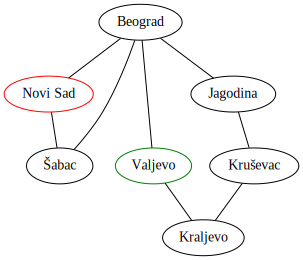

In [4]:
g = Graph()

for grad in gradovi:
    color = None
    if grad == pocetni_grad:
        color = "red"
    if grad == ciljni_grad:
        color = "green"
    g.node(grad, color=color)
    
for veza in veze:
    g.edge(veza[0], veza[1])
    
g

Transformacija podataka u jednostavniji format. U ovom slučaju podaci se skladište u rečnik čiji ključevi su čvorovi dok su vrednosti na ključevima liste čvorova do kojih je moguće stići iz posmatranog čvora.

In [5]:
graf = {}
for grad in gradovi:
    graf[grad] = []
    for veza in veze:
        if grad == veza[0]:
            graf[grad].append(veza[1])
        if grad == veza[1]:
            graf[grad].append(veza[0])
print(graf)

{'Beograd': ['Novi Sad', 'Šabac', 'Valjevo', 'Jagodina'], 'Novi Sad': ['Beograd', 'Šabac'], 'Valjevo': ['Beograd', 'Kraljevo'], 'Šabac': ['Beograd', 'Novi Sad'], 'Kraljevo': ['Valjevo', 'Kruševac'], 'Kruševac': ['Jagodina', 'Kraljevo'], 'Jagodina': ['Beograd', 'Kruševac']}


Implementacija BFS pretrage.

In [6]:
za_pretragu = [(None, pocetni_grad)] # Pretraga počinje od zadatog grada.
                                     # Kako ovaj grad predstavlja početak pretrage
                                     # ne postoji grad koji mu je prethodio.
poseceni = set() # Skup posećenih gradova je na početku prazan skup.
pronadjen = None # Početno cilj nije pronađen.

while(len(za_pretragu) > 0 and pronadjen is None): # Pretraga se vrši dok god ima neposećenih gradova i cilj nije pronađen.
    na_obradi = za_pretragu[0] # Vrši se poseta grada koji je prvi na redu za posetu.
    del za_pretragu[0] # Kako je poseta ovog grada u toku, grad se uklanja iz spiska gradova za posetu.
    
    if na_obradi[1] == ciljni_grad: # Ukoliko je posećeni grad ciljni grad,
        pronadjen = na_obradi       # putanja do grada je pronađena.
                                    # Vrednost promenljive pronadjen postavlja se
                                    # na grad koji je bio na obradi.
    elif na_obradi not in poseceni: # Ukoliko grad nije ciljni grad i grad nije prethodno posećen
        for cvor in graf[na_obradi[1]]: # svi gradovi sa kojima je povezan
            if cvor not in poseceni: # a koji nisu posećeni
                za_pretragu.append((na_obradi[1], cvor)) # dodaju se u spisak gradova za posetu.
        poseceni.add(na_obradi) # Grad je konačno posećen i dodaje se u skup posećenih gradova.
            
print(pronadjen) # Ispis pronađenog grada.
print(poseceni) # Ispis svih posećenih gradova.

('Beograd', 'Valjevo')
{('Novi Sad', 'Šabac'), ('Novi Sad', 'Beograd'), (None, 'Novi Sad'), ('Beograd', 'Šabac'), ('Beograd', 'Novi Sad')}


Pravljenje putanje do ciljnog grada.

In [7]:
koren = pronadjen # Koren putanje predstavlja pronađeni grad.
putanja = [] # Putanja je na početku prazna.

while koren[0] is not None: # Putanja se pravi sve dok se ne dođe do početnog grada.
    putanja.append(koren) # Koren se dodaje u putanju.
    for p in poseceni: # U svim posećenim gradovima se traži grad iz kojeg se stiglo u koren.
        if koren[0] == p[1]:
            koren = p # Pronađeni grad predstavlja novi koren.
            break

putanja.reverse() # Dobijena putanja je usmerena od ciljnog ka početnom gradu, zbog toga je putanju neophodno obrnuti.

Iscrtavanje putanje u grafu.

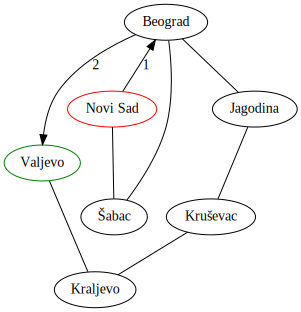

In [9]:
g = Graph()

for grad in gradovi:
    color = None
    if grad == pocetni_grad:
        color = "red"
    if grad == ciljni_grad:
        color = "green"
    g.node(grad, color=color)
    
korak = 0
for veza in veze:
    dir = None
    label = None
    if len(putanja) > korak:
        if veza[0] == putanja[korak][0] and veza[1] == putanja[korak][1]:
            dir="forward"
            korak += 1
            label = "{}".format(korak)
        elif veza[1] == putanja[korak][0] and veza[0] == putanja[korak][1]:
            dir="back"
            korak += 1
            label = "{}".format(korak)
    g.edge(veza[0], veza[1], dir=dir, label=label)
    
g